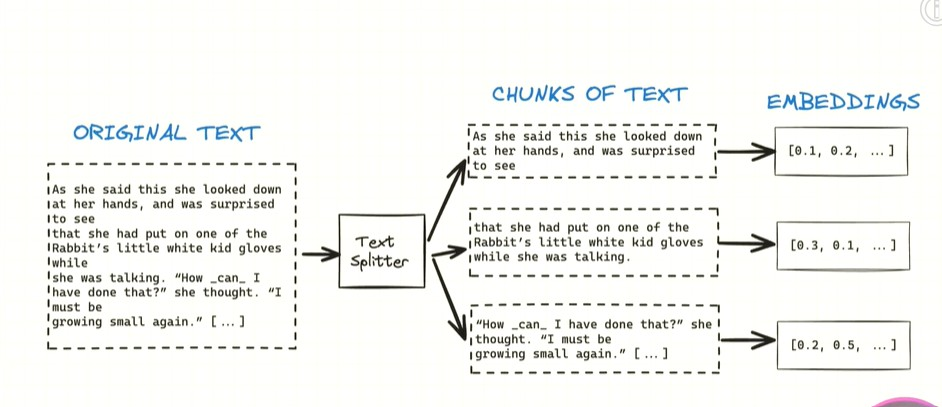

In [1]:
from PIL import Image
Image.open("/content/llm_1.jpg")

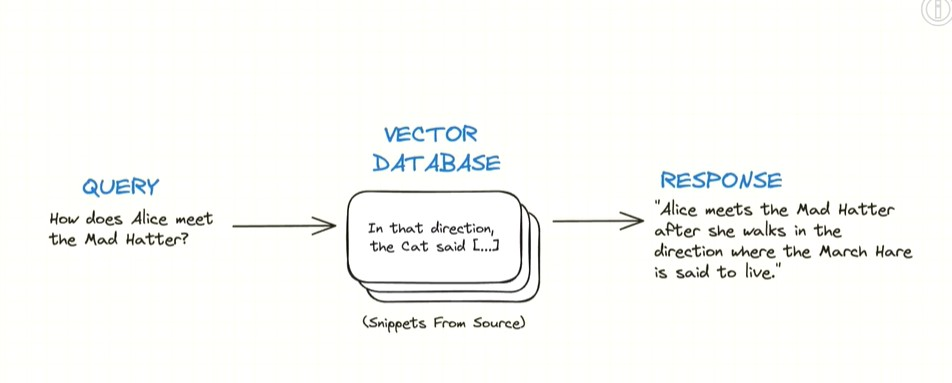

In [3]:
Image.open("/content/llm_2.jpg")

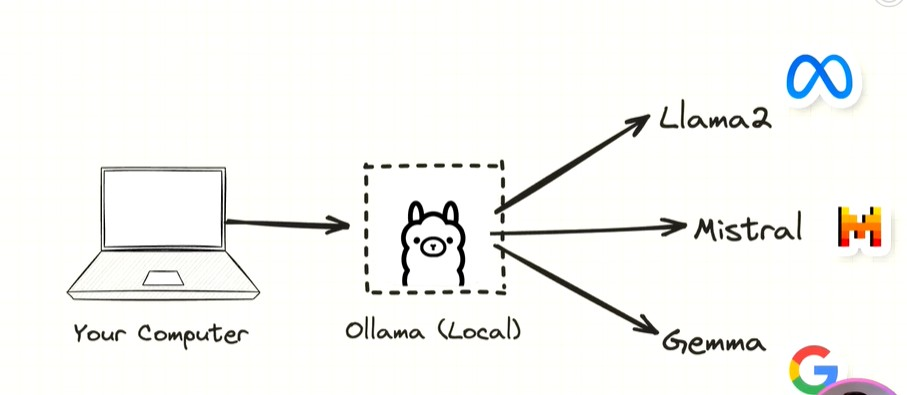

In [4]:
Image.open("/content/llm_3.jpg")

In [ ]:
## running lag locally
## updating your database
## testing rag output

In [ ]:
## Loading the data

In [ ]:
from langchain.document_loaders import PyPDFLoader
def load_documents():
  document_loader=PyPDFDirectoryLoader(DATA_PATH)
  return document_loader.load()
documetns=load_documents()
print(documents[0])


In [ ]:
##split the documents

In [ ]:
from langchain_text_splitter import CharacterTextSplitter
from langchain.schema.document import Document
def split_documents(documents):
  text_splitter=CharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
  return text_splitter.split_documents(documents)
documents=split_documents(documents)
chuncks=documents
print(chuncks[0])

In [ ]:
from langchain_community.embedding import BedrockEmbeddings
embeddings=BedrockEmbeddings(model_id="amazon.titan-embed-text-v1")

In [ ]:
def get_embedding_function():
  embeddings=BedrockEmbeddings(model_id="amazon.titan-embed-text-v1")
  return embeddings

In [ ]:
from langchain_community.embeddings import OllamaEmbeddings
embeddings=OllamaEmbeddings(model="llama2")


In [ ]:
def get_embedding_function():
  embeddings=OllamaEmbeddings(model="nomic-embed-text")
  return embeddings

In [ ]:
#ollama download
## ollama pull llama2
## ollama pull mistral
## ollama server
##

In [ ]:
## creating the database

In [ ]:
from get_embedding_function import get_embedding_function
from langchain.vectorstores.chroma import Chroma
from langchain.embeddings import BedrockEmbeddings

In [ ]:
def add_to_chroma(documents):
  embeddings=get_embedding_function()
  return Chroma.from_documents(documents,embeddings)

In [ ]:
##updating database

In [ ]:
from langchain.vectorstores.chroma import Chroma
from langchain.embeddings import BedrockEmbeddings
db=Chroma(persist_directory=PERSIST_DIRECTORY,embedding_function=get_embedding_function())
new_chucnks_id=[chunck.metadata["source"] for chunck in chuncks]
db.add_documents(chuncks,ids=new_chucnks_id)
db.persist()
print(new_chucnks_id)

In [ ]:
## running rag locally

In [ ]:
from langchain_community.embeddings.ollama  import OllamaEmbeddings
def get_embedding_function():
  embeddings=OllamaEmbeddings(model="nomic-embed-text")
  return embeddings

In [ ]:
## Hybrid approach

In [ ]:
from langchain.vectorstores.chroma import Chroma
from langchain.embeddings import BedrockEmbeddings
db=Chroma(persist_directory=PERSIST_DIRECTORY,embedding_function=get_embedding_function())
new_chucnks_id=[chunck.metadata["source"] for chunck in chuncks]
db.add_documents(chuncks,ids=new_chucnks_id)
db.persist()
print(new_chucnks_id)

In [ ]:
def query_rag(query):
  embeddings=get_embedding_function()
  db=Chroma(persist_directory=PERSIST_DIRECTORY,embedding_function=embeddings)

In [ ]:
PROMPT_TEMPLATE="""
Given the following context and a question, generate an answer based on this context only.
In the answer try to provide as much text as possible from "response" section in the source document context without making
{context}
{question}
### Response
"""

In [ ]:
results=db.similarity_search(query,k=3)

In [ ]:
## QUALITY OF ANSWERS
## sOURCE Material
## text splitting stratergy
## LLM Model and Prompt

In [ ]:
## Unit testing with pytest

In [ ]:
## How much total money that was spent on the NBA Game
##answer: 1500

In [ ]:
response_text=query_rag("How much total money that was spent on the NBA Game")
prompt=PROMPT_TEMPLATE.format(context=response_text,question="How much total money that was spent on the NBA Game")
model=Ollama(model="mistral")
evaluation_result_str=model.invoke(prompt)
print(evaluation_result)

In [ ]:
final_result=evaluation_result_str.strip().lower()
if "true" in final_result:
  return True
elfi "false" in final_result:
  return False
else:
  return ValuError("CANNOT DETERMINE IF TRUE OR FALE")

In [ ]:
def test_monoply_rules():
  assert query_and_validate("How much total money that was spent on the NBA Game","1500",expected_answer="$1500")
